# Dataset Description

In [49]:
#1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards. 

#2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

#3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

#4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

#5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

#6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

#7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

#8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

#9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

#10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [50]:
import pandas as pd

# A plotting library for creating static, interactive, and animated visualizations.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns

#A high-level interface for creating a variety of interactive visualizations.
import plotly.express as px

#Used for standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

#Used for splitting datasets into training and testing sets for machine learning
from sklearn.model_selection import train_test_split

#Metrics commonly used for evaluating machine learning models.
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

%matplotlib inline

In [51]:
#load the training dataset

df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# exploratory Data Analysis

In [52]:
#To show the shape of the data set

df.shape

(3276, 10)

In [53]:
#To show thw Null values

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [54]:
#information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [55]:
#quickly verifying data after sorting rows
df.tail

<bound method NDFrame.tail of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  

In [56]:
#print the all columns

df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [57]:
#To describe data

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


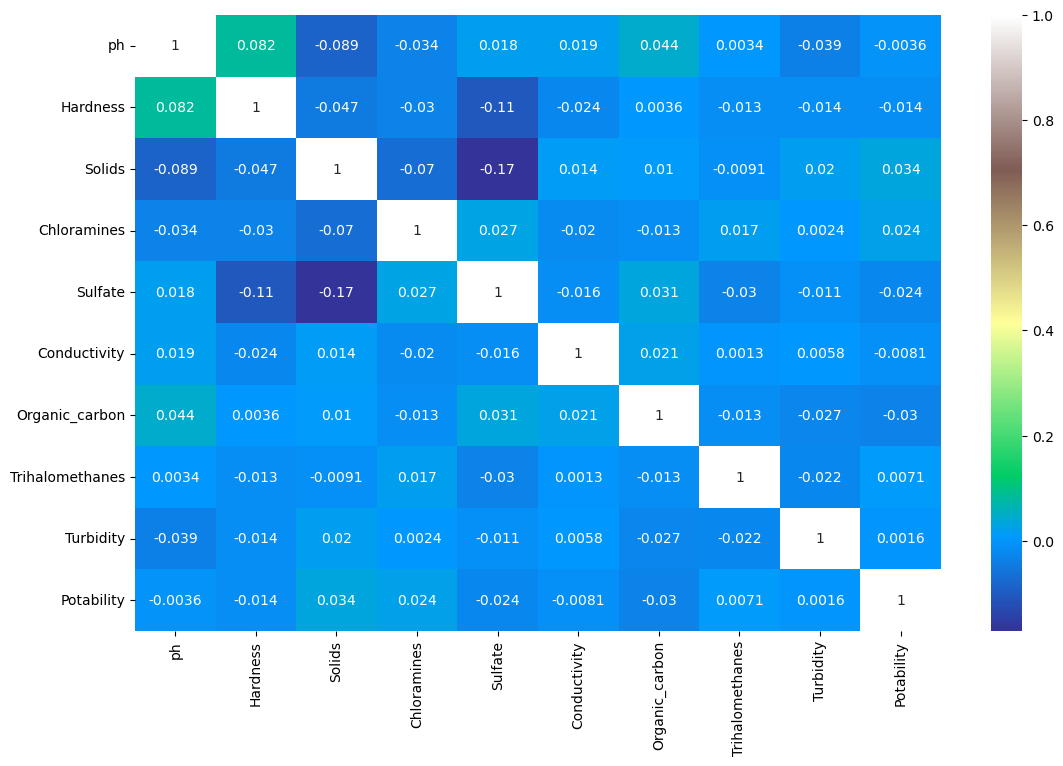

In [58]:
# Set the size of the figure
plt.figure(figsize=(13,8))
# Create a heatmap of the correlation 
#heat map is a graphical representation using colors to represent differnt values
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

C:\Users\manisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


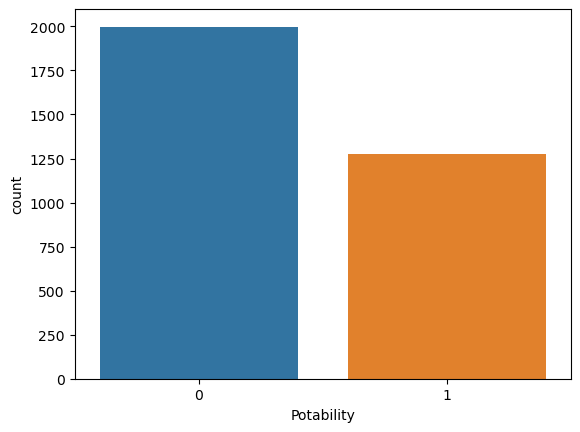

In [59]:
# Create a count plot of the 'Potability' column
#countplot is used to observe the occuracnce of categorical variable(qualitative variable)
sns.countplot(df['Potability'])
plt.show()

In [60]:
#it is used to return count of all unique values in descending order without including null values
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

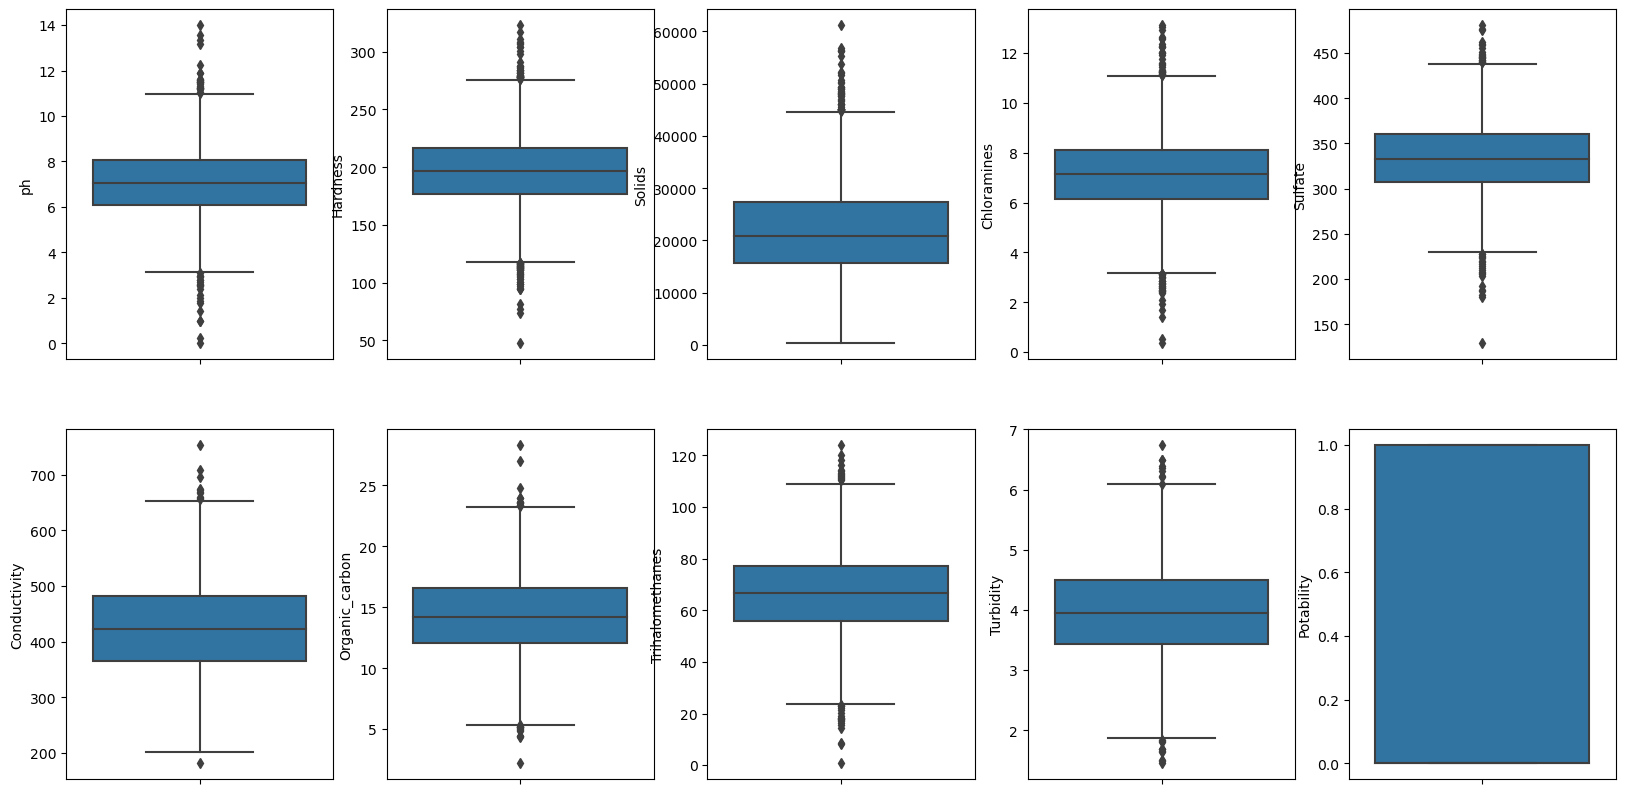

In [61]:
#Visulaization dataset also checking for outliers

fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
ax=ax.flatten()
index=0
for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1

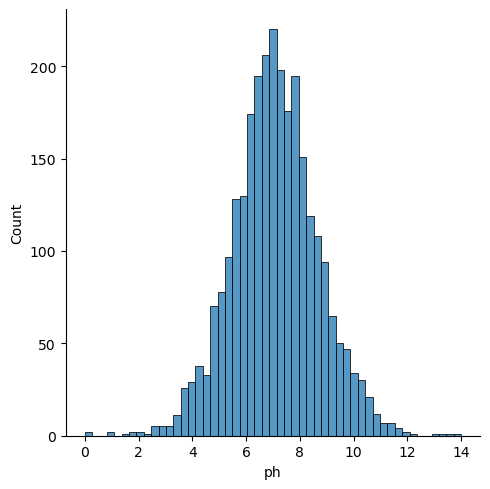

In [62]:
# Create a distribution plot of the 'ph' column
#displot is used to compare theoritical vs practical values
sns.displot(df['ph'])
plt.show()

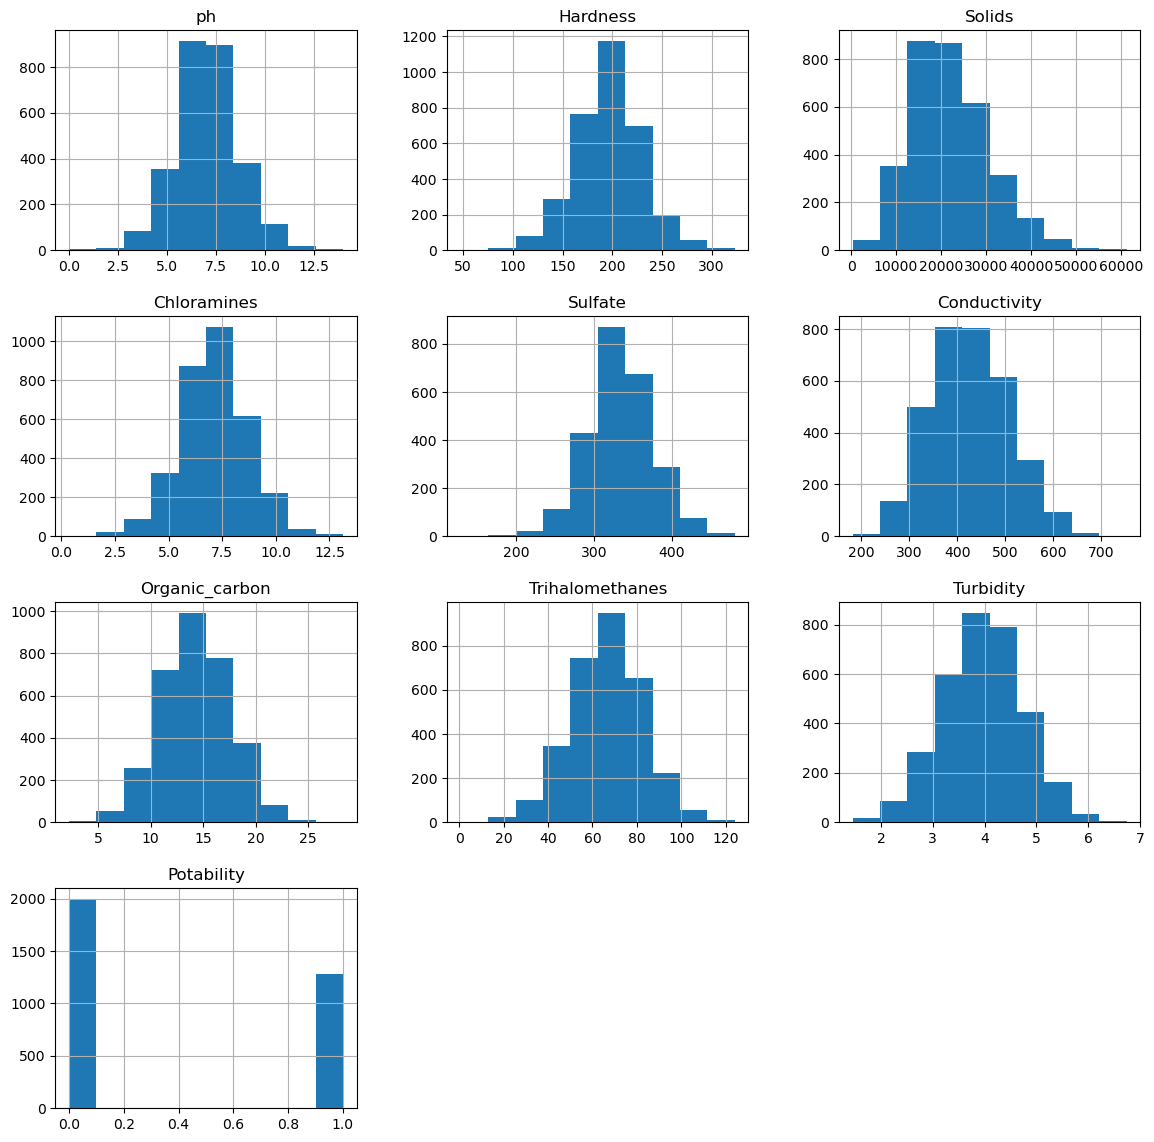

In [63]:
# Create histograms for each column in the DataFrame

df.hist(figsize=(14,14))
plt.show()

<AxesSubplot:>

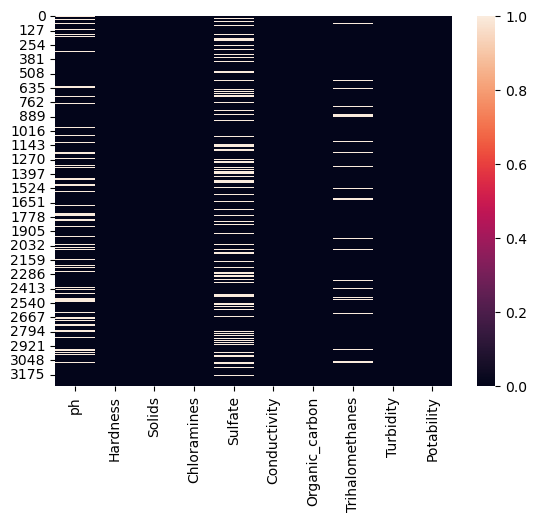

In [64]:
# Create a heatmap to visualize missing values

sns.heatmap(df.isnull())

In [65]:
# Fill missing values with the mean of each column

df.fillna(df.mean(),inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

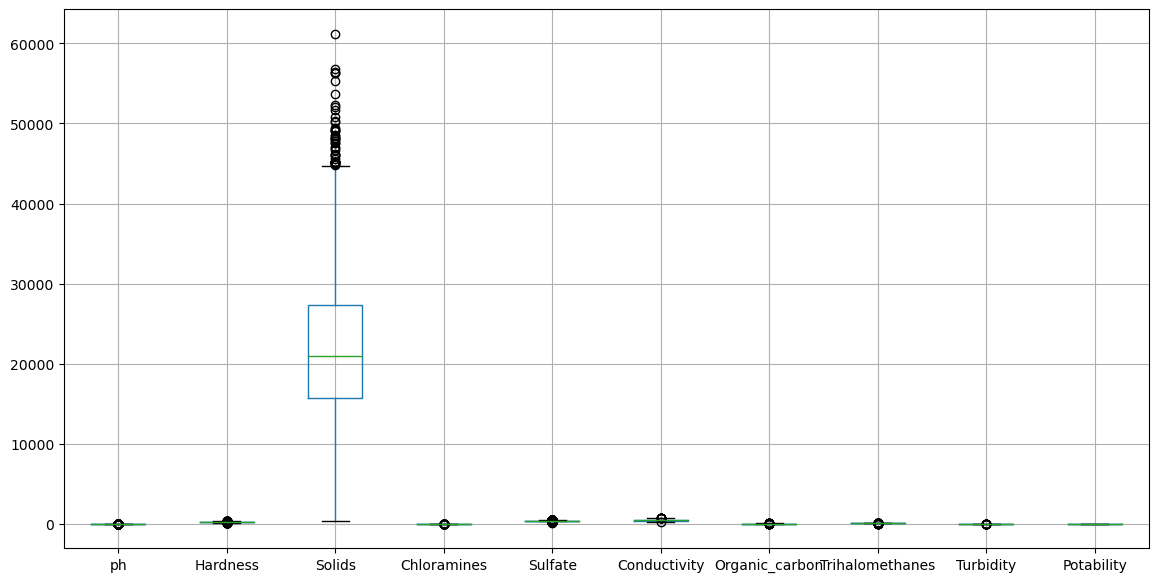

In [66]:
df.boxplot(figsize=(14,7))

# Data Preparation

In [67]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [68]:
x.shape,y.shape

((3276, 9), (3276,))

In [69]:
# ssuming you already have x defined

scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [71]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

# Model Development

#### We will use the following models:¶

# Logistic Reggression

In [72]:
#Logistic Regression
#simple and more efficient method for both binary and linear classification problems

from sklearn.linear_model import LogisticRegression

#Object of Logistic Regression

model_lr=LogisticRegression()

In [73]:
#Training model
#training model is a dataset used to train ml algorithm
model_lr.fit(x_train,y_train)

LogisticRegression()

In [74]:
#making prediction
pred_lr=model_lr.predict(x_test)


In [75]:
#accuracy score
#accuracy score is a metric that measures how often a model correctly predicts the outcome

accuracy_score_lr=accuracy_score(y_test,pred_lr)
accuracy_score_lr

0.6280487804878049

# Decision Tree Classifier

In [76]:
# a tree like model displays outcomes ,consequences and costs
from sklearn.tree import DecisionTreeClassifier

#creating the model object
model_dt=DecisionTreeClassifier(max_depth=4)


In [77]:
#Training model of decision tree
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [78]:
#making prediction
pred_dt=model_dt.predict(x_test)


In [79]:
#accuracy score

accuracy_score_dt=accuracy_score(y_test,pred_dt)
accuracy_score_dt

0.6600609756097561

In [80]:
#confusion matrx
# a matrix used to evaluate performance of a model
cm2=confusion_matrix(y_test,pred_dt)
cm2

array([[392,  20],
       [203,  41]], dtype=int64)

# Random Forest Classification

In [81]:
# rf is ml algorithm which combines output of multiple decision tree to a single output

In [82]:
from sklearn.ensemble import RandomForestClassifier
#creating model object
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(x_train,y_train)
model_rf=RandomForestClassifier()

In [83]:
#Training model RF 
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
#making prediction
pred_rf=model_rf.predict(x_test)

In [85]:
#Accuract score

accuaracy_score_rf=accuracy_score(y_test,pred_rf)
accuaracy_score_rf*100

68.59756097560977

In [86]:
#Confusion Marix

cm3=confusion_matrix(y_test,pred_rf)
cm3

array([[364,  48],
       [158,  86]], dtype=int64)